# New Lesson 3: Morphological Operations and Quantifications

You now know how to find objects of interest in an image and produce masks which correspond to these objects. Up until now, we've relied on good image preprocessing to produce quality masks. Now we will talk about morphological operations, which instead focus on making improvements to the masks directly.

1. In this module you will first learn
   What is a morphological operation
   How to choose the right parameters for your morphological operation
   Some common morphological operations
    - Erosion
    - Dilation
    - Opening
    - Closing


2. To quantify the change in nuclear localization and amount of your favorite protein with drug treatment. We would like to be able to answer two questions: 

    1) Does the *total* amount of protein per cell change with drug treatment and 
    2) How does the localization change between the nucleus and the cytoplasm? 
    
    Addressing these questions requires care when choosing the preprocessing algorithms to apply and their ordering, as well as batch processing across datasets.

3. Access properties of cells that have been detected, such as
    - Area
    - Intensity
    - Image vs mask properties
    - Measures of roundness
    - Aspect ratio
    - Convexity
    
   View the statistics of properties of detected cells;
   Filter out unwanted cells based on their properties

### 3.1 Load previously processed data (filter and thresholding)

3.1.1. Load functions

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.ndimage

sns.set_style('dark', rc={'image.cmap':'inferno'})

3.1.2. Load images

In [2]:
# MAKE SURE YOU ADD YOUR DIRECTORY BELOW
from skimage.io import imread

data_drug = imread("/Users/ahmedelkaffas/Documents/Repositories/DataLucense/dev-summer2018/Data_ConfocalDrugPanel/drugA.tif")
data_nodrug = imread("/Users/ahmedelkaffas/Documents/Repositories/DataLucense/dev-summer2018/Data_ConfocalDrugPanel/DMSO.tif")

3.1.3. Load meta data

In [3]:
import json
with open('/Users/ahmedelkaffas/Documents/Repositories/DataLucense/dev-summer2018/Data_ConfocalDrugPanel/DMSO_metadata.json', mode='r') as f_nodrug:
    meta_nodrug = json.load(f_nodrug)

for key, value in meta_nodrug.items():
    print(key)

drug_slice = {}
nodrug_slice = {}
for idx, channel in enumerate(meta_nodrug['channels']):
    drug_slice[channel] = data_drug[3,:,:,idx]
    nodrug_slice[channel] = data_nodrug[3,:,:,idx] #add in the indexing when read in full dataset
    print(channel)

axes
pixel_size
cell_type
channels
raw_data_date
image_preprocessing_done
your_fav_protein
nucleus
actin


3.1.4. Show images

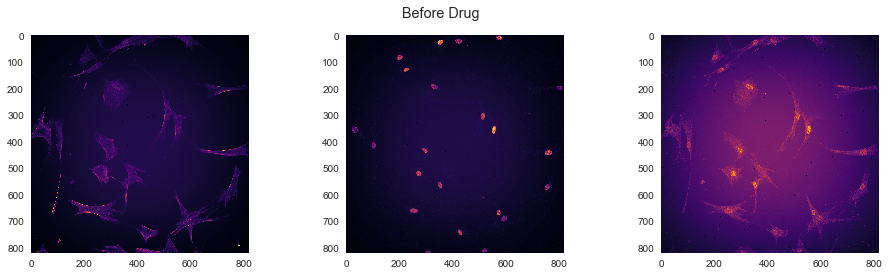

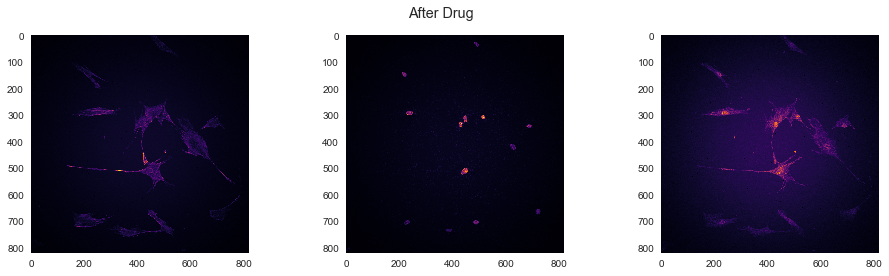

In [4]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].imshow(nodrug_slice["actin"])
ax[1].imshow(nodrug_slice['nucleus'])
ax[2].imshow(nodrug_slice["your_fav_protein"])
fig.suptitle('Before Drug')

fig, ax = plt.subplots(1, 3, figsize=(16, 4))
ax[0].imshow(drug_slice["actin"])
ax[1].imshow(drug_slice['nucleus'])
ax[2].imshow(drug_slice["your_fav_protein"])
fig.suptitle('After Drug')

3.1.5 Masking


In [5]:
#answer
def mask_im(im, threshold):
    mask = np.zeros(im.shape)
    mask[im >=threshold] = 1
    plt.imshow(mask, vmin = 0, vmax = 1)
    return(mask)

### Morphological Operations

3.2.1 Pre-set

In [6]:
from skimage.filters.rank import median as median_filter # Our Median Filter
from skimage.filters.rank import minimum as min_filter # Our background removal filter
from skimage.filters import threshold_otsu # Our Otsu

import skimage.morphology as sm
from skimage.morphology import disk

3.2.2. Pre-process and threshold



/Users/ahmedelkaffas/anaconda/lib/python3.6/site-packages/skimage/filters/rank/generic.py:102: UserWarning: Bitdepth of 15 may result in bad rank filter performance due to large number of bins.
  "performance due to large number of bins." % bitdepth)


(<matplotlib.figure.Figure at 0x11a607908>,
 <matplotlib.image.AxesImage at 0x11a639d68>)

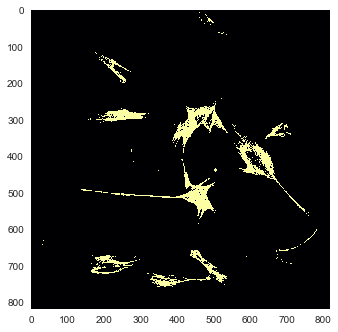

In [9]:
# Let's work only with one channel 
# Apply the median filt
channel = "actin"
data = drug_slice.copy()
f_size = 1
medfilt_data = median_filter(data[channel], disk(f_size))

# Apply the min filt
r_size = 70
bkg = min_filter(medfilt_data, disk(r_size))
filt_data = medfilt_data - bkg
filt_data[filt_data<0] = 0

# Otsu threshold
thresh = threshold_otsu(filt_data)
otsu_filt_data = mask_im(filt_data, thresh)

fig, plt.imshow(otsu_filt_data, cmap='inferno')



3.2.3. Four Seperate Operation Results

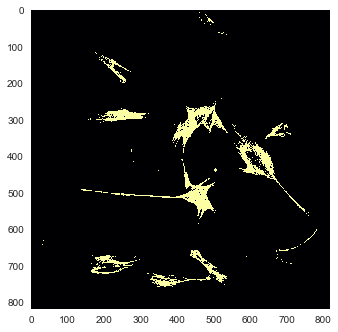

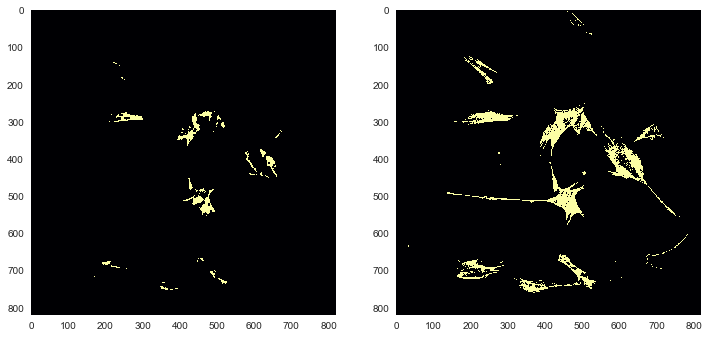

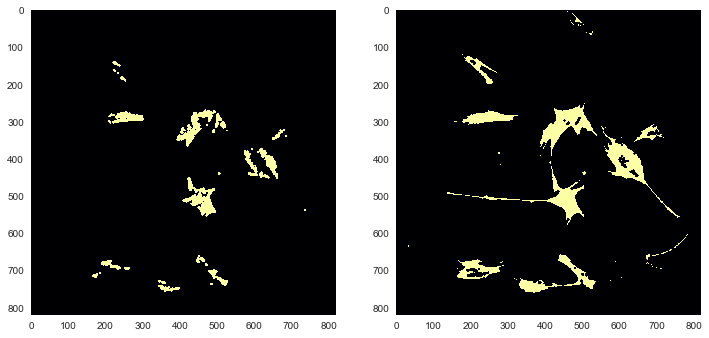

In [12]:
# Let's do Erosion/Dilation together
drug_erode = sm.binary_erosion(otsu_filt_data, sm.disk(3))
drug_dilate = sm.binary_dilation(otsu_filt_data, sm.disk(3))

fig, plt.imshow(otsu_filt_data)

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(drug_erode)
ax[1].imshow(drug_dilate)

# TRY WITH OPENING AND CLOSING
drug_close = sm.binary_closing(otsu_filt_data, sm.disk(3))
drug_open = sm.binary_opening(otsu_filt_data, sm.disk(3))

fig, plt.imshow(otsu_filt_data)

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(drug_open)
ax[1].imshow(drug_close)


3.2.4. Optimized Operation Results (Closing-opening)

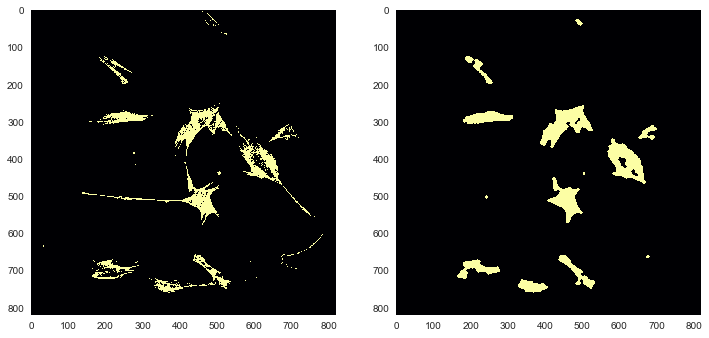

In [13]:
# Add morphological operations
morph1 = sm.binary_closing(otsu_filt_data,sm.disk(4))
mask = sm.binary_opening(morph1, sm.disk(4))

fig, ax = plt.subplots(1,2, figsize=(12,6))
ax[0].imshow(otsu_filt_data)
ax[1].imshow(mask)

### 3.3 Quantifications

3.3.1. Find cell body by getting rid of nuclei from the dialated actin mask 

#### Calculate a mean nuclear and cytoplasmic intensities of *your_fav_protein*. For this, we'll apply our masks to the image of interest.

#### Challenge: process image #2

3.3.2. Final measure of nuclear and cytoplasmic averages

### 3.4 Quantifying Properties of Identified Regions or Cells


3.4.1. Load lable function and label cells with different colors

3.4.2. Load regionprops function and get the properties of the labeled cells


3.4.3. Load interactive function and show the chosen labeled cells

3.4.4. Show single cell mask properties: 6th cell's area

#### Challenge: what is the actual value of area in mm^2? Note: using the scale in meta data.

3.4.5. Show single cell mask properties: 6th cell's mean_intensity,centroid, weighted_centroid

3.4.6. Measures of roundness


Ratio

Solidity

Roundness

### More properties you can get:
#### [link: full parameters in regionprops](http://scikit-image.org/docs/0.8.0/api/skimage.measure.html#skimage.measure.regionprops)